# MOVIELENS RECOMMENDATION SYSTEMS


### Collaborators
- 1.Ruth Kitasi
- 2.Agatha Nyambati
- 3.Joseline Apiyo
- 4.Cecilia Ngunjiri
- 5.John Mbego
- 6.Leonard Koyio

![movie-img.jpeg](movie-img.jpeg)

# 1.BUSINESS UNDERSTANDING

## 1.1 Overview

In today's world of massive data growth, recommendation systems have become essential tools for filtering information and enhancing user experiences. These systems help users find relevant content by analyzing their past behaviors, such as search queries or browsing histories.

Companies like YouTube and Spotify use recommendation algorithms to suggest the next video or curate personalized playlists based on user preferences.

In line with our project objective we aim to harness the power of data analysis to build a movie recommendation system that provides users with personalized movie suggestions.

By analyzing user ratings of other movies, we can generate tailored recommendations that align with individual preferences. The goal is to develop a model that delivers the top 5 movie recommendations for each user, optimizing their viewing experience based on their previous interactions.

## 1.2 Problem statement

With the vast amount of content available on streaming platforms, users often feel overwhelmed by choices, making it difficult to discover movies that align with their preferences. Traditional search methods fall short in addressing this challenge, resulting in a less satisfying user experience and decreased engagement.

MovieLens has tasked our team of data scientists with optimizing their recommendation system through data-driven approaches. By analyzing user behaviors and preferences, we aim to enhance the system's ability to deliver personalized movie recommendations.

## 1.3 Objectives

- Develop a model to provide personalized top 5 movie recommendations for users based on their ratings and preferences, utilizing collaborative filtering techniques.

- Determine the rating frequency of users based on various features, such as genre, director, and release year, to identify patterns in user preferences.

- Analyze key features that contribute to the popularity of trending movies to enhance the effectiveness of the recommendation system in suggesting relevant content.

- Implement collaborative filtering techniques, including both user-based and item-based methods, to segment users and items, improving the accuracy of personalized recommendations.

- Create a solution to address the cold start problem by recommending popular and trending movies to new users with no prior ratings, ensuring an engaging initial experience.


# 2. DATA UNDERSTANDING

## 2.1 Data Source

The dataset https://grouplens.org/datasets/movielens/, was obtained from the GroupLens website which  is a well-known resource for research in recommendation systems and data analysis.

The Movielens comprises of four files:

1.`Links`:  contains three features:-
  
- movieId is a unique identifier for movies used movielens
- imdbId is a unique identifier for  movie on IMDb
- tmdbId is a unique identifier for movies on the TMDb

2.`movies`:  contains three features:-

- movieId.
- Title contains titles of the movie
- Genre- contains genre of each movie title

3.`Ratings`:  contains three features:-

- userID - This is a unique identifier assigned to each user who has rated movies in the dataset
- movieID.
- Rating-This represents the user's rating for a particular movie.
- Timestamp-records the date and time when the rating was given.

4.`tags`:  contains four features:-

- userID 
- movieID.
- Tags-contains descriptive keywords or phrases that characterize the movie 
- Timestamp


  

## 2.2 Data loading


In [53]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
## reading the files
links = pd.read_csv('ml-latest-small\links.csv')
movies = pd.read_csv('ml-latest-small\movies.csv')
tags = pd.read_csv(r'ml-latest-small\tags.csv')
ratings = pd.read_csv(r'ml-latest-small\ratings.csv')

Viewing few columns of each file

In [55]:
# viewing the link file
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [56]:
# viewing the movie file
movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [57]:
# viewing the ratings file
ratings.sample(n=5)

,userId,movieId,rating,timestamp
25017,177,1027,3.0,1435978323
67279,434,46578,4.0,1270604825
70446,448,148709,2.0,1489843891
77308,483,648,2.0,1178293442
59571,387,2134,2.5,1095041316


In [58]:
# viewing the tags file
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Getting a consise summary of each file using the info() method.

In [59]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [61]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [62]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [63]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [64]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [65]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [66]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


Getting a summary of the number of rows and columns of each dataset

In [67]:
rows, colums =links.shape
print(f'The links dataset has {rows} rows and {colums} columns')

The links dataset has 9742 rows and 3 columns


In [68]:
rows, colums =movies.shape
print(f'The movies dataset has {rows} rows and {colums} columns')

The movies dataset has 9742 rows and 3 columns


In [69]:
rows, colums =ratings.shape
print(f'The ratings dataset has {rows} rows and {colums} columns')

The ratings dataset has 100836 rows and 4 columns


In [70]:
rows, colums =tags.shape
print(f'The tags dataset has {rows} rows and {colums} columns')

The tags dataset has 3683 rows and 4 columns


#### Observations made from data undertanding

- All the four files have a common feature which is the movieID column.
- The links and the movie datasets have equal number of rows of 9742.
- Each dataset presents a mixed type of data.(int64, object and float64)

## 2.3 Merging Files

Given that the four datasets share a common feature, the movie ID, we will use this column to perform a merge, consolidating the datasets into a single file. This approach ensures not only the integration of information from different sources but also enhances data completeness and facilitates more thorough analysis.

In [71]:
## Merging files on the common feature the MovieID

##Step 1: Merging the movies and the links datasets.
movies_links_merged =  pd.merge(movies, links, on='movieId', how='inner')
movies_links_merged.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [72]:
##Step 2: Merging the movies_links_merged and ratings datasets on movieId

movies_links_ratings_merged =pd.merge(ratings, movies_links_merged,on='movieId', how='inner')
movies_links_ratings_merged.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


In [74]:
##Step 3: Merging the results of movies_links_rating_merged with the tags dataset.
final_merge =  pd.merge(movies_links_ratings_merged, tags, on='movieId')
final_merge.head()

,userId_x,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,userId_y,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar,1139045764
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474,pixar,1137206825
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567,fun,1525286013
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar,1139045764
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474,pixar,1137206825


In [100]:
##Step 3: Merging the results of movies_links_rating_merged with the tags dataset.
final_merge =  pd.merge(movies_links_ratings_merged, tags, on=['movieId','userId'])
final_merge.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


In [75]:
## Checking the number of rows and colums of our final merged dataset

rows, colums = final_merge.shape
print(f'The final merged dataset contains {rows} rows and {colums} colums')

The final merged dataset contains 233213 rows and 11 colums


In [76]:
##Getting the conside summary of the final merged dataset

final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId_x     233213 non-null  int64  
 1   movieId      233213 non-null  int64  
 2   rating       233213 non-null  float64
 3   timestamp_x  233213 non-null  int64  
 4   title        233213 non-null  object 
 5   genres       233213 non-null  object 
 6   imdbId       233213 non-null  int64  
 7   tmdbId       233213 non-null  float64
 8   userId_y     233213 non-null  int64  
 9   tag          233213 non-null  object 
 10  timestamp_y  233213 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 21.4+ MB


The output shows that the final_merged dataset contains 3 types as follows:
- 2 float64
- 6 int664
- 3 Object

The memory usage of the final merged dataset is approximately 21.4 MB. This suggests that the dataset has grown significantly after merging, especially due to the repetition of movie information across different user ratings and tag.

High Movie Engagement: The fact that the merged dataset contains 233,213 rows while the ratings dataset had 100,836 rows suggests that multiple users have rated, tagged, or interacted with the same movie, indicating high engagement for some movies.


In [77]:
final_merge.describe()

,userId_x,movieId,rating,timestamp_x,imdbId,tmdbId,userId_y,timestamp_y
count,233213.000000,233213.000000,233213.000000,2.332130e+05,2.332130e+05,233213.000000,233213.000000,2.332130e+05
mean,309.688191,12319.999443,3.966535,1.213524e+09,2.610632e+05,9378.277742,470.683564,1.384774e+09
std,178.206387,28243.919401,0.968637,2.250448e+08,4.414411e+05,36943.139800,153.329632,1.534621e+08
min,1.000000,1.000000,0.500000,8.281246e+08,1.234900e+04,11.000000,2.000000,1.137179e+09
25%,156.000000,296.000000,3.500000,1.017365e+09,1.103570e+05,278.000000,424.000000,1.242494e+09
50%,309.000000,1198.000000,4.000000,1.217325e+09,1.109120e+05,680.000000,477.000000,1.457901e+09
75%,460.000000,4638.000000,5.000000,1.443201e+09,1.724950e+05,1892.000000,599.000000,1.498457e+09
max,610.000000,193565.000000,5.000000,1.537799e+09,5.580390e+06,503475.000000,610.000000,1.537099e+09


userId_x and userId_y: The user IDs range from 1 to 610, which shows that there are 610 unique users in the dataset

Each column has 233,213 entries, meaning no missing values for the columns shown (movieId, imdbId, tmdbId, userId_x, rating, timestamp_x, userId_y, timestamp_y).

Movie IDs range from 1 to 193565, suggesting a large dataset covering a wide variety of movies.
The 50th percentile (50%, or median) movie ID is 1198, indicating that half the movies have an ID less than 1198.
The average (mean) movie ID is 12319.99, which is much higher than the median, indicating a right-skewed distribution of movie IDs (a few movies with very high IDs).

imdbId and tmdbId: Similarly, the IMDb IDs and TMDB IDs show a broad range from 12,349 to 5,580,390 (IMDb) and from 11 to 503,475 (TMDB), also suggesting a wide variety of movie records. The high standard deviation indicates significant variation in these IDs.

The mean rating is approximately 3.97, indicating that, on average, users gave higher ratings (closer to 4)

The mean timestamp (timestamp_x) is about 1.213 billion, which corresponds to around 2008 and maximum timestamp suggests ratings were given around 2018.

Right-skewed Distribution: Both movieId and rating columns exhibit right-skewed distributions. This could influence modeling choices, as the majority of movies or users may fall within a specific subset of the range.

In [99]:
#creating a copy of the final merge for to perform data cleaning
Movies_df = final_merge
Movies_df.head()

,Userid_X,Movieid,Rating,Timestamp,Title,Genres,Imdbid,Tmdbid,Userid_Y,Tag,Date,Time,Year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,336,pixar,2000-07-30,18:45:03,2000
1,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,474,pixar,2000-07-30,18:45:03,2000
2,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,567,fun,2000-07-30,18:45:03,2000
3,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,336,pixar,1996-11-08,06:36:02,1996
4,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,474,pixar,1996-11-08,06:36:02,1996


## 3.DATA CLEANING

Now that we have merged our dataset, we will take the following steps to ensure it is clean and ready for analysis:

1. `Handling duplicates colums` to avoid redundancy.

2. `Removing unnecessary columns` that don't contribute to the analysis.

3. `Renaming columns` to improve readability.

4. `Case Conversion` to ensure that all our headers are standadized.

5. `Checking for missing` and address them appropriately.

6. `Ensure consistent data types` across all columns.

5. `Filter irrelevant rows` to keep only valid and useful information.

## 3.1.1Handling duplicates colums

In [79]:
#checking if there are duplicate columns
# .
#Compare userId_X and user1D_y to check id they have columns for identical values
Movies_df['userId_x'].equals(Movies_df['userId_y'])


False

In [80]:
#Compare userI_X and user1D_y to check id they have columns for identical values
Movies_df['timestamp_x'].equals(Movies_df['timestamp_y'])

False

After a carefull inspection we note the following:- 

- userId_x and userId_y are no duplicate since the returned output is False.
- timestamp_x and timestamp_x are duplicates as the retured output is True.


## 3.2 Removing Unnceccesary columns.

In [95]:
# ## Removing the timeshtamp_y since it is a duplicate of timestamp_y
# Movies_df.drop(['timestamp_y'],axis=1, inplace=True)

# #checking the dataset after removing the timestamo_y collumn
# Movies_df.head()

## 3.3 Renaming columns.

In [82]:
#Renaming the timestamp_x column
Movies_df.rename(columns={'timestamp_x':'timestamp'}, inplace=True)

#checking the dataset after remaming our desired column
Movies_df.head()

,userId_x,movieId,rating,timestamp,title,genres,imdbId,tmdbId,userId_y,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567,fun
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474,pixar


## 3.4 Case Coversion.

In [83]:
#converting our headers to title case from the current lowercase.
Movies_df.rename(columns=lambda x: x.title(), inplace=True)

##viewing our dataset our the headers converstion
Movies_df.sample(n=5)


,Userid_X,Movieid,Rating,Timestamp,Title,Genres,Imdbid,Tmdbid,Userid_Y,Tag
128972,380,32,5.0,1493494899,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,477,time travel
145241,7,589,2.5,1106635940,Terminator 2: Judgment Day (1991),Action|Sci-Fi,103064,280.0,424,apocalypse
84585,599,1198,3.5,1498500961,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,82971,85.0,474,indiana jones
206301,249,58295,3.0,1346756548,"Bank Job, The (2008)",Action|Crime|Thriller,200465,8848.0,537,small time criminals
168627,477,6333,4.0,1200942153,X2: X-Men United (2003),Action|Adventure|Sci-Fi|Thriller,290334,36658.0,474,Wolverine


## 3.5 Checking and Handling Missing Values.

In [84]:
if Movies_df.isnull().values.any():
    print(True)
else:
    print(None)

None


The output confirms that our movie_df has no missing values.

## 3.6 Ensure consistent data types.

In [85]:
#Checking the datatype of each column
print(Movies_df.dtypes)

Userid_X       int64
Movieid        int64
Rating       float64
Timestamp      int64
Title         object
Genres        object
Imdbid         int64
Tmdbid       float64
Userid_Y       int64
Tag           object
dtype: object


The tmdbId is of float64 type. we will proceed and convert these to int64 datatype

The timestamp is a Int64. We will proceed and convert this to a datetime standard format.


In [86]:
## Convert tmdbId column to int64
Movies_df['Tmdbid'] = Movies_df['Tmdbid'].astype('int64')

In [87]:
# Creating a new dataframe
Movies= pd.DataFrame(Movies_df)

# Converting the timestamp_x column to datetime format
Movies['Timestamp'] = pd.to_datetime(Movies['Timestamp'], unit='s')

# Displaying the DataFrame
Movies.head()

,Userid_X,Movieid,Rating,Timestamp,Title,Genres,Imdbid,Tmdbid,Userid_Y,Tag
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,336,pixar
1,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,474,pixar
2,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,567,fun
3,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,336,pixar
4,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,474,pixar


Now our Tmdbid is converted to our desired datatype which is the int64.

In [88]:
# Create 'Date' and 'Time' columns
Movies['Date'] = Movies['Timestamp'].dt.date
Movies['Time'] = Movies['Timestamp'].dt.time

#viewing the dataset
Movies.head()

,Userid_X,Movieid,Rating,Timestamp,Title,Genres,Imdbid,Tmdbid,Userid_Y,Tag,Date,Time
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,336,pixar,2000-07-30,18:45:03
1,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,474,pixar,2000-07-30,18:45:03
2,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,567,fun,2000-07-30,18:45:03
3,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,336,pixar,1996-11-08,06:36:02
4,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862,474,pixar,1996-11-08,06:36:02


In [101]:
# Convert 'Date' to datetime to extract the year
Movies['Date'] = pd.to_datetime(Movies['Date'])


#Exctracting the year colum form the Date column
Movies['Year'] = Movies['Date'].dt.year

# Display the updated DataFrame
Movies.tail(20)


,Userid_X,Movieid,Rating,Timestamp,Title,Genres,Imdbid,Tmdbid,Userid_Y,Tag,Date,Time,Year
233193,599,114627,3.0,2017-06-27 01:20:29,Angel's Egg (Tenshi no tamago) (1985),Animation|Drama|Fantasy,208502,15916,567,bizzare,2017-06-27,01:20:29,2017
233194,599,114627,3.0,2017-06-27 01:20:29,Angel's Egg (Tenshi no tamago) (1985),Animation|Drama|Fantasy,208502,15916,567,eerie,2017-06-27,01:20:29,2017
233195,599,114627,3.0,2017-06-27 01:20:29,Angel's Egg (Tenshi no tamago) (1985),Animation|Drama|Fantasy,208502,15916,567,symbolism,2017-06-27,01:20:29,2017
233196,567,117877,3.0,2018-05-02 19:00:04,The Rabbi's Cat (Le chat du rabbin) (2011),Adventure|Animation,1355638,75491,567,philosophical,2018-05-02,19:00:04,2018
233197,567,117877,3.0,2018-05-02 19:00:04,The Rabbi's Cat (Le chat du rabbin) (2011),Adventure|Animation,1355638,75491,567,trippy,2018-05-02,19:00:04,2018
233198,567,153070,3.5,2018-05-02 17:41:19,Rabbits (2002),Comedy|Drama|Fantasy,347840,44351,567,nightmare,2018-05-02,17:41:19,2018
233199,567,156605,4.5,2018-05-02 17:50:48,Paterson,(no genres listed),5247022,370755,567,quirky,2018-05-02,17:50:48,2018
233200,567,156605,4.5,2018-05-02 17:50:48,Paterson,(no genres listed),5247022,370755,567,sweet,2018-05-02,17:50:48,2018
233201,567,156605,4.5,2018-05-02 17:50:48,Paterson,(no genres listed),5247022,370755,567,understated,2018-05-02,17:50:48,2018
233202,567,170945,3.5,2018-05-02 18:41:52,It Comes at Night (2017),Horror|Mystery|Thriller,4695012,418078,567,paranoia,2018-05-02,18:41:52,2018


Now our timestamp column is converted to our desired datatype.

In [90]:
#Checking our dataset after performing datatype convertions
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Userid_X   233213 non-null  int64         
 1   Movieid    233213 non-null  int64         
 2   Rating     233213 non-null  float64       
 3   Timestamp  233213 non-null  datetime64[ns]
 4   Title      233213 non-null  object        
 5   Genres     233213 non-null  object        
 6   Imdbid     233213 non-null  int64         
 7   Tmdbid     233213 non-null  int64         
 8   Userid_Y   233213 non-null  int64         
 9   Tag        233213 non-null  object        
 10  Date       233213 non-null  datetime64[ns]
 11  Time       233213 non-null  object        
 12  Year       233213 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(4)
memory usage: 24.9+ MB


## 3.7 Filtering irrelevant rows.

In [91]:
# checking for duplicates rows in our dataset.
duplicate_rows = movies.duplicated()

# Count duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())


Number of duplicate rows: 0


We have no duplicated rows in our dataset. This means that each row is unique.

# 4.0 EXPLANATORY DATA ANALYSIS

In [92]:
# Count the total number of movies and unique titles per year
year_counts = Movies_df.groupby('Year').agg(
    Total_Movies=('Title', 'count'),
    Unique_Titles=('Title', 'nunique')
).reset_index()

# Sorting the results by the total number of movies in descending order
year_counts = year_counts.sort_values(by='Total_Movies', ascending=False)

# Display the results
print(year_counts)

    Year  Total_Movies  Unique_Titles
0   1996         23471            233
19  2015         19938            738
21  2017         19240            833
20  2016         17749            668
4   2000         16346            687
11  2007         13863            853
22  2018         13107            769
16  2012         12129            729
12  2008         11667            713
9   2005         11351            869
10  2006         10848            704
13  2009          8434            740
5   2001          6577            587
6   2002          6495            586
3   1999          5991            457
14  2010          5819            499
7   2003          5812            759
15  2011          5406            415
8   2004          5297            753
17  2013          5168            414
1   1997          4280            312
18  2014          3127            337
2   1998          1098            176


In [93]:
# Display unique Titles
unique_titles = Movies['Title'].unique()

# Count occurrences of each Title
title_counts = Movies['Title'].value_counts()
print("\nTitle Counts:")
print(title_counts)


Title Counts:
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
                                                                  ...  
Guerrilla: The Taking of Patty Hearst (2004)                          1
Anna Karenina (1997)                                                  1
Sansho the Bailiff (Sanshô dayû) (1954)                               1
Country Girl, The (1954)                                              1
Dark Water (Honogurai mizu no soko kara) (2002)                       1
Name: Title, Length: 1554, dtype: int64


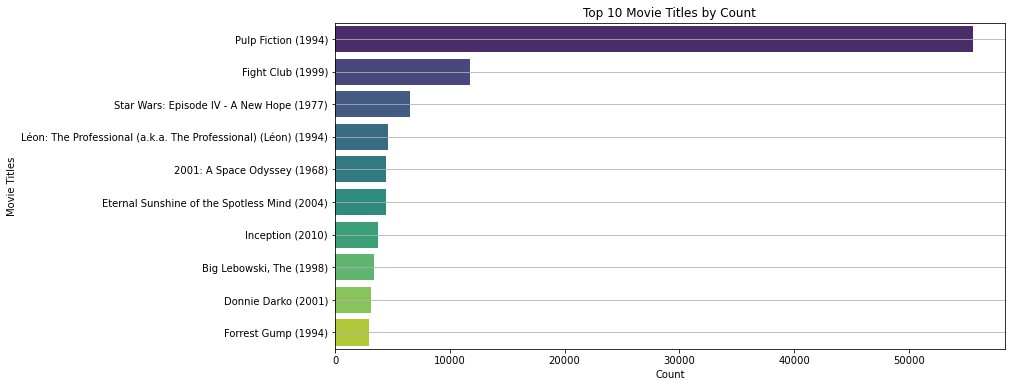

In [94]:
# Displaying the top 10 titles with the highest frequecy.
# Count occurrences of each title
# Count occurrences of each title
title_counts = Movies_df['Title'].value_counts()

# Get the top 10 titles
top_10_titles = title_counts.head(10).reset_index()
top_10_titles.columns = ['Title', 'Count']

# Create a horizontal bar graph
plt.figure(figsize=(12, 6))
sns.barplot(y='Title', x='Count', data=top_10_titles, palette='viridis')  # Note the swap of x and y
plt.title('Top 10 Movie Titles by Count')
plt.ylabel('Movie Titles')
plt.xlabel('Count')
plt.grid(axis='y')
plt.show()
